### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela

### Tema escolhido: Uso de variáveis explicativas específicas para estimar o rendimento médio mensal real de um cidadão brasileiro.

### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiroz
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano Motta
___

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

ModuleNotFoundError: No module named 'sklearn'

___
### Texto introdutório ao trabalho:

O objetivo deste projeto é de prever a renda média mensal de um/uma brasileiro/a, baseado em diversas características desta pessoa, como: Escolaridade, cor e raça, idade, sexo e região. Para isso, o grupo fará a utilização de uma base de microdados do PNAD (pesquisa nacional por amostra de domicílios contínua), nesta base, estão disponíveis uma grande quantidade de características dos moradores de cada domicílio, dentre estas características, encontram-se as variáveis features que o grupo utilizará para prever o comportamento da variável target (renda média mensal do cidadão).

Para melhor compreender o panorama geral da distribuição de renda no país, o grupo consultou um artigo do Valor Econômico (portal de notícias sobre economia do grupo Globo), intitulado: “Você é rico ou pobre? Confira a calculadora e saiba em que posição está na distribuição de renda no Brasil”. Com a leitura da matéria, pode-se observar que em 2023, metade da população brasileira possuía uma renda per capita de até R$ 1.177,00 por mês. O rendimento médio per capita no país em 2023 foi de aproximadamente: R$ 1.818,00.
	
Considerando que o salário mínimo no país era de R$ 1.320,00 em 2023, pode-se concluir que metade da população recebia abaixo do salário mínimo e a média salarial per capita do país está próximo a esse salário mínimo.

___
### Variável Target: Rendimento médio mensal 



___
### Variáveis explicativas (features): 

- Escolaridade (Qualitativa)

- Cor e raça (Qualitativa)

- Idade (Quantitativa)

- Sexo (Qualitativa)

- Região "UF" (Qualitativa)

- Área (Qualitativa)

- Trabalho (Qualitativa)

___
### Período selecionado: Segundo trimestre de 2023.

Link para base de micro-dados deste período: 




In [ ]:
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'

___


### Amostra geral da base de micro-dados utilizada para melhor compreensão:

Abaixo segue uma demonstração de como está inicialmente organizada a base de microdados. O objetivo desta primeira exibição da base de microdados é de facilitar a compreensão do leitor sobre as manipulações e análises exploratórias que serão feitas.

In [ ]:
pnad23_2_all = pd.read_csv('../pnad23_2.csv', sep=';')
pnad23_2_all

,Unnamed: 0,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,0,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,1,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2,2023,2,11,11.0,NaN,110000016,1110011,2,10,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,3,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,4,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


___
### Filtragem das variáveis explicativas (features):

Para atingir o objetivo de estimar a renda média mensal de um cidadão a partir das variáveis (features) selecionadas destas pessoas, o grupo inicialmente filtrou a base de microdados para que fossem guardados os valores em tabela apenas das variáveis (features) selecionadas. Como são muitos dados disponíveis para consulta, caso isso não fosse feito, a base de dados ficaria pesada e poluída, dificultando assim a organização e a análise exploratória destes dados. 

Além disso, os títulos das colunas desta base de micro-dados, são codificados e não são de fácil compreensão, por exemplo: A variável idade na base dados é identificada como "V2009", cor ou raça é identificada como "V2010" e Sexo é identificado por "V2007". Esta codificação de informações torna a compreensão do conjunto de micro-dados mais difícil. Sendo assim, o grupo utilizou a função "rename" para renomear as colunas e tornar a base de microdados mais fácil de ser interpretada.

In [ ]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'VD3004', # Nível de instrução mais elevado alcançado
           'VD4002', # Condição na ocupação do trabalho principal
           'VD4007', # Posição na ocupação do trabalho principal
           'VD4020',] # Rendimento bruto mensal de todos os trabalhos

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv('../pnad23_2.csv', sep=';', usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'VD3004':'Escolaridade',
                               'VD4002':'Ocupacao',
                               'VD4007':'Trabalho',
                               'VD4020':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,11,1,1,30,4,5.0,1.0,3.0,5000.0
1,2023,2,11,1,2,29,4,5.0,NaN,NaN,NaN
2,2023,2,11,1,2,50,4,7.0,1.0,1.0,3500.0
3,2023,2,11,1,2,25,4,5.0,NaN,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,7.0,1.0,1.0,10000.0
474571,2023,2,53,1,2,30,1,7.0,1.0,1.0,2500.0
474572,2023,2,53,1,1,51,1,7.0,1.0,1.0,4000.0
474573,2023,2,53,1,2,56,1,7.0,1.0,1.0,5000.0


___

### Alteração da descrição da categoria das variáveis qualitativas 

Variáveis qualitativas são variáveis que não possuem um valor númerico, são normalmente utilizadas para definir rótulos. Entretanto, na base de micro-dados analisada, o conteúdo das colunas de variáveis qualitativas está preenchido com números, o que dificulta a compreensão de cada elemento da coluna. Por exemplo: Na coluna "Sexo", homem está definido como "1" e mulher esta definido como "2", quando na realidade homens deveriam estar definidos como "Homem" e mulheres como "Mulher". Sendo assim, o grupo fez a utilização da função "rename_categories" em todas as variáveis qualitativas que estavam representadas com números , para que estas fossem representadas com rótulos. 

#### 1) UF (Estado da Residência)

In [ ]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: UF, dtype: float64

#### 2) Área de Residência

In [ ]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Urbana    73.4
Rural     26.6
Name: Area, dtype: float64

#### 3) Sexo

In [ ]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem',
                                                                 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Mulher    51.6
Homem     48.4
Name: Sexo, dtype: float64

#### 4) Cor e Raça

In [ ]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: Cor_Raca, dtype: float64

#### 5) Nível de Escolaridade

In [ ]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Sem Instrução e menos de 1 ano de estudo',
                                                                                 2:'Fundamental incompleto ou equivalente',
                                                                                 3:'Fundamental completo ou equivalente',
                                                                                 4:'Médio incompleto ou equivalente',
                                                                                 5:'Médio completo ou equivalente',
                                                                                 6:'Superior incompleto ou equivalente',
                                                                                 7:'Superior completo',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Fundamental incompleto ou equivalente       35.9
Médio completo ou equivalente               24.2
Superior completo                           12.2
Sem Instrução e menos de 1 ano de estudo     9.3
Fundamental completo ou equivalente          7.6
Médio incompleto ou equivalente              6.9
Superior incompleto ou equivalente           3.9
Name: Escolaridade, dtype: float64

#### 6) Posição de Trabalho

In [ ]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Empregado',
                                                                         2:'Empregador',
                                                                         3:'Conta própria',
                                                                         4:'Trabalhador familiar auxiliar',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Empregado                        65.2
Conta própria                    28.2
Empregador                        4.0
Trabalhador familiar auxiliar     2.6
Name: Trabalho, dtype: float64

#### 7) Ocupação

In [ ]:
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.astype('category')
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.cat.rename_categories({1:'Ocupado',
                                                                         2:'Desocupado',})
pnad23_2_small.Ocupacao.value_counts(True).round(3)*100

Ocupado       92.5
Desocupado     7.5
Name: Ocupacao, dtype: float64

### Interpretação da base de microdados organizada e categorizada corretamente:

Com as informações devidamente categorizadas, não só a interpretação da base de microdados foi facilitada, mas também agora se tornou possível realizar uma análise exploratória destes microdados e com isso, pode-se estabelecer relações entre a variável target (quantitativa) e as demais variáveis explicativas.

Este foi o resultado de como ficou a base de dados após ter sido feito a correta categorização de cada informação:

In [ ]:
# Salvando a base de dados small em CSV para reduzir o tempo de processamento
# pnad23_2_small.to_csv('P3_small.csv', sep=';', index=False)
dados_small = pd.read_csv("../P3_small.csv", sep=';')
dados_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,RO,Urbana,Mulher,50,Parda,Superior completo,Ocupado,Empregado,3500.0
1,2023,2,RO,Urbana,Mulher,54,Branca,Superior completo,Ocupado,Empregado,3700.0
2,2023,2,RO,Urbana,Homem,59,Preta,EF completo,Ocupado,Empregado,3000.0
3,2023,2,RO,Urbana,Homem,38,Parda,Superior completo,Ocupado,Empregado,3000.0
4,2023,2,RO,Urbana,Mulher,62,Parda,EF completo,Ocupado,Empregado,800.0
...,...,...,...,...,...,...,...,...,...,...,...
132337,2023,2,DF,Urbana,Mulher,28,Branca,Superior completo,Ocupado,Empregado,7000.0
132338,2023,2,DF,Urbana,Homem,38,Branca,Superior completo,Ocupado,Empregado,10000.0
132339,2023,2,DF,Urbana,Mulher,30,Branca,Superior completo,Ocupado,Empregado,2500.0
132340,2023,2,DF,Urbana,Homem,51,Branca,Superior completo,Ocupado,Empregado,4000.0


___

### Explicação variáveis quantitativas e coeficientes de correlação

Variáveis quantitativas são aquelas que possuem um valor númerico que permite que sejam feitas operações matemáticas com outras varáveis quantitativas, além disso, com variáveis deste tipo é possível extrair coeficientes de correlação que são fundamentais para compreender as relações entre diferentes variáveis quantitativas. Com estes coeficientes é possível classificar a relação entre estas variáveis como diretamente proporicionais, inversamente proporcionais, ou isoladas. Caso este coeficiente seja maior que zero, serão diretamente proporcionais, menor que zero, inversamente proporcionais e igual a zero, isoladas (o valor de uma variável não interfere no da outra).

Análise exploratória dos dados obtidos

Agora, com a base de microdados organizada e categorizada corretamente, o grupo irá fazer a análise exploratória dos dados. Esta análise consiste em realizar o cruzamento de dados entre a variável target (renda média mensal) com as demais variáveis explicativas. A partir deste cruzamento de dados, é possível construir gráficos de diferentes formatos e extrair coeficientes de correlação entre variáveis quantitativas. Os resultados desta análise exploratória de dados são fundamentais para prever o comportamento da variável target em diferentes cenários, considerando os valores das variáveis explicativas selecionadas.

A depender do tipo das variáveis que estão sendo relacionadas, existem modelos de gráficos específicos que devem ser utilizados para cada uma. Quando a relação é entre duas variáveis quantitativas, deve-se utilizar os gráficos de dispersão, quando ambas são qualitativas, deve-se utilizar os gráficos de barras "stacked" e por fim, quando se trata de uma variável quantitativa e uma qualitativa, deve-se utilizar os gráficos do tipo Histograma ou Boxplot.

In [ ]:
siglas_UF = {'Rondônia':'RO',
             'Acre':'AC',
             'Amazonas':'AM',
             'Roraima':'RR',
             'Pará':'PA',
             'Amapá':'AP',
             'Tocantins':'TO', 
             'Maranhão':'MA',
             'Piauí':'PI',
             'Ceará':'CE',
             'Rio Grande do Norte':'RN',
             'Paraíba':'PB',
             'Pernambuco':'PE',
             'Alagoas':'AL',
             'Sergipe':'SE',
             'Bahia':'BA',
             'Minas Gerais':'MG',
             'Espírito Santo':'ES',
             'Rio de Janeiro':'RJ',
             'São Paulo':'SP',
             'Paraná':'PR',
             'Santa Catarina':'SC',
             'Rio Grande do Sul':'RS',
             'Mato Grosso do Sul':'MS',
             'Mato Grosso':'MT',
             'Goiás':'GO',
             'Distrito Federal':'DF'}
pnad23_2_small.UF = pnad23_2_small.UF.map(siglas_UF)


siglas_escolaridade = {'Sem Instrução e menos de 1 ano de estudo':'Menos de 1 ano de estudo',
                       'Fundamental incompleto ou equivalente':'EF incompleto',
                       'Fundamental completo ou equivalente':'EF completo',
                       'Médio incompleto ou equivalente':'EM incompleto',
                       'Médio completo ou equivalente':'EM completo',
                       'Superior incompleto ou equivalente':'Superior incompleto',
                       'Superior completo':'Superior completo',
                       'Não aplicável':'NA'}
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.map(siglas_escolaridade)

In [ ]:
pessoas_ocupadas = pnad23_2_small.loc[pnad23_2_small['Ocupacao'] == 'Ocupado']
empregados = pnad23_2_small.loc[pnad23_2_small['Trabalho'] == 'Empregado']

In [ ]:
# Salvando a base de dados small em CSV para reduzir o tempo de processamento
empregados.to_csv("../P3_small.csv", sep=';', index=False)

dados_small = dados_small.loc[dados_small['Renda'] <= 12000]

### Boxplots

<Figure size 1000x600 with 0 Axes>

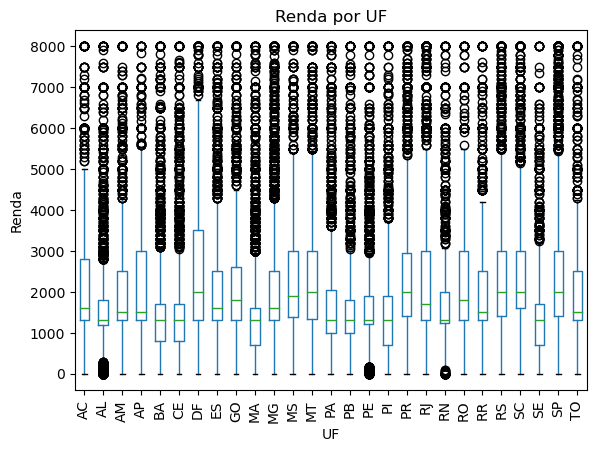

<Figure size 1000x600 with 0 Axes>

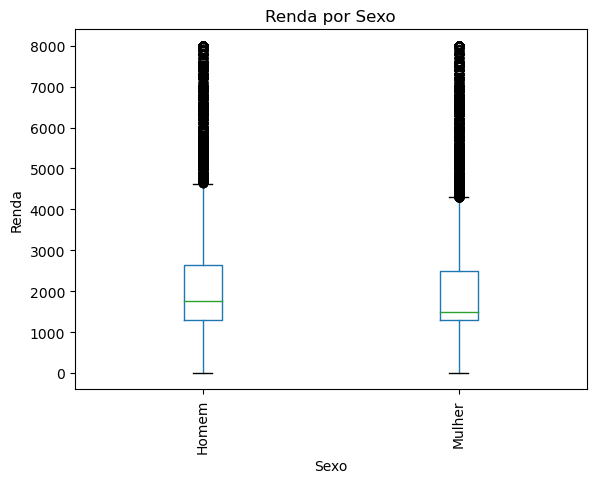

<Figure size 1000x600 with 0 Axes>

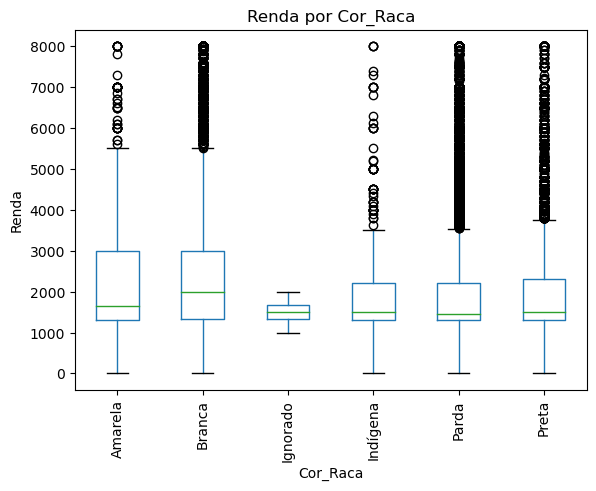

<Figure size 1000x600 with 0 Axes>

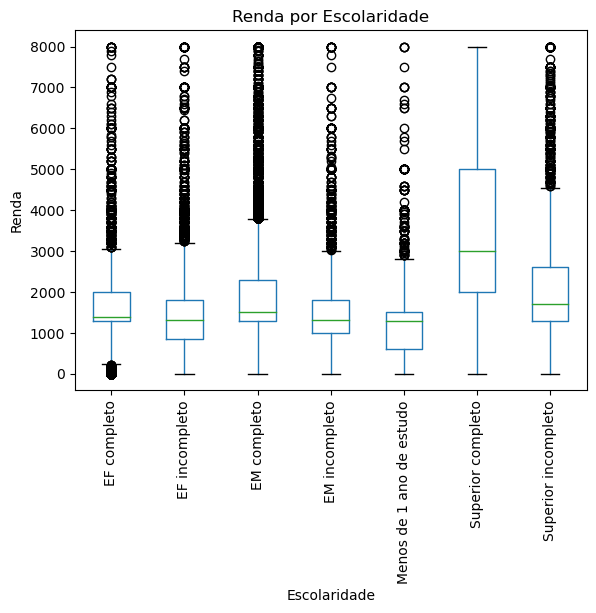

<Figure size 1000x600 with 0 Axes>

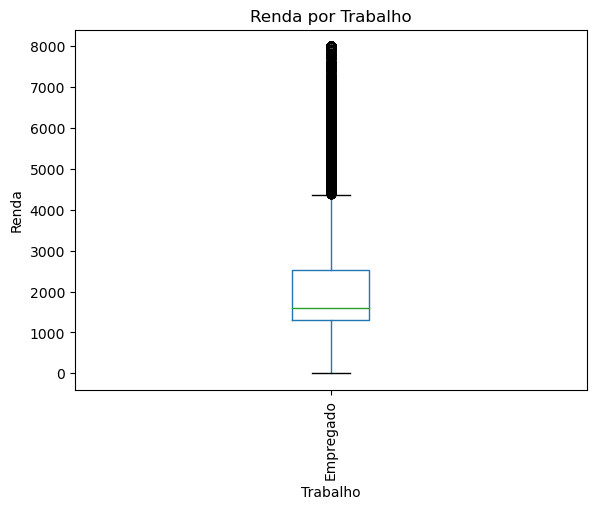

<Figure size 1000x600 with 0 Axes>

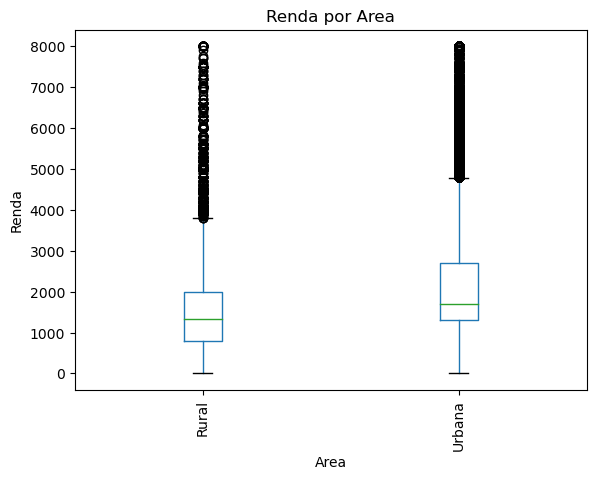

In [ ]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(10,6))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.xticks(rotation=90)  # Rotacionar rótulos para melhor visualização
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado em um percentil da renda
limite_97 = dados_small.Renda.quantile(0.97)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(dados_small, variavel, limite_97)

### Gráfico de Dispersão

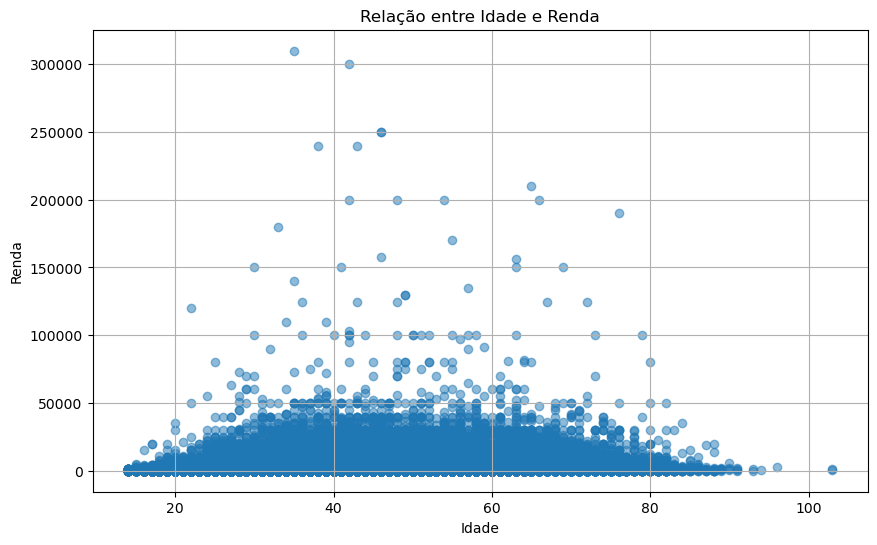

0.0984789287113297


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pnad23_2_small.Idade, pnad23_2_small.Renda, alpha=0.5)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.grid(True)
plt.show()

coef_correlacao = pnad23_2_small.Idade.corr(pnad23_2_small.Renda)

print(coef_correlacao)

## Interpretação dos gráficos:

### 1. Renda X UF (estado): 

Neste gráfico é possível observar que segundo os dados analisados deste período, existe uma relação entre renda média e UF (estado). Ou seja, existem estados que possuem uma renda média maior que outros. Sendo assim, a variável explicativa "UF" possui influência sobre a variável target (renda média mensal).


### 2. Renda X Sexo: 

Neste gráfico é possível observar que segundo os dados analisados deste período, os homens ganham ligeiramente mais do que as mulheres. Ou seja, a variável explicativa "Sexo" possui influência sobre a variável target (renda média mensal).


### 3. Renda X Raça/Cor: 

Neste gráfico é possível observar que segundo os dados analisados deste período, pessoas de cor de pele branca possuem uma renda média mensal maior quando comparado à indíviduos com as demais cores de pele. Em segundo lugar, encontram-se as pessoas de cor de pele amarela. Em terceiro, as pessoas de cor de pele preta e por último empatados, ficam os indígenas e pardos. Ou seja, a variável explicativa "Raça/cor" possui influência sobre a variável target (renda média mensal).


### 4. Renda X Escolaridade: 

Neste gráfico é possível observar que segundo os dados analisados deste período, pessoas com um grau mais elevado de escolaridade possuem uma renda média mensal superior as outras. Por exemplo, cidadãos com doutorado, segundo o gráfico, possuem uma renda média mensal significantemente superior a cidadãos com apenas ensino superior completo (graduação). Ou seja, a variável explicativa "Escolaridade" possui influência sobre a variável target (renda média mensal).


### 5. Renda X Trabalho: 

Neste gráfico é possível observar que segundo os dados analisados deste período, os cidadãos que trabalham no setor militar do exército possuem uma média salarial superior, entretanto, isto ocorre pois a remuneração no exército ocorre de forma prodominanatemente homogênea. Caso observemos os empregados do setor privado, existem diversos casos em que estes possuem uma renda superior aos trabalhadores do exército.  Ou seja, a variável explicativa "Trabalho" possui influência sobre a variável target (renda média mensal).

### 6. Renda X Área: 

Neste gráfico é possível observar que segundo os dados analisados deste período, cidadãos residentes em áreas urbanas possuem uma renda média mensal maior quando comparado a indivíduos que residem em zonas rurais. Ou seja, a variável explicativa "Área" possui influência sobre a variável target (renda média mensal).

### 7. Renda X Idade: 

Com a análise do gráfico e do coeficiente de correlação, é possível observar que segundo os dados analisados deste período, cidadãos com uma maior idade tendem a possuir uma renda média mensal superior a pessoas mais jovens. Entretanto, a renda média mensal tem um declínio exponenecial após os 60 anos de idade. Ou seja, a variável explicativa "Idade" possui influência sobre a variável target (renda média mensal).

In [ ]:
dados_small.describe()

,Ano,Trimestre,Idade,Renda
count,129354.0,129354.0,129354.000000,129354.000000
mean,2023.0,2.0,38.508705,2294.366931
std,0.0,0.0,12.848758,1941.259759
min,2023.0,2.0,14.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000
50%,2023.0,2.0,38.000000,1600.000000
75%,2023.0,2.0,48.000000,2666.000000
max,2023.0,2.0,103.000000,12000.000000


In [ ]:
dados_small.isnull().sum()

Ano             0
Trimestre       0
UF              0
Area            0
Sexo            0
Idade           0
Cor_Raca        0
Escolaridade    0
Ocupacao        0
Trabalho        0
Renda           0
dtype: int64

In [ ]:
dummies_UF = pd.get_dummies(dados_small['UF'],drop_first=True,dtype='int64')
dummies_UF

,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132337,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132338,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132339,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132340,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies_Sexo = pd.get_dummies(dados_small['Sexo'],drop_first=True,dtype='int64')

In [ ]:
dummies_Cor_Raca = pd.get_dummies(dados_small['Cor_Raca'],drop_first=True,dtype='int64')

In [ ]:
dummies_Escolaridade = pd.get_dummies(dados_small['Escolaridade'],drop_first=True,dtype='int64')

In [ ]:
dummies_Area = pd.get_dummies(dados_small['Area'],drop_first=True,dtype='int64')

In [ ]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [ ]:
dados_small_dummies = pd.concat([dados_small, dummies_UF, dummies_Sexo, dummies_Cor_Raca, dummies_Escolaridade, dummies_Area], axis=1)
dados_small_dummies.columns

Index(['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana'],
      dtype='object')

In [ ]:
df = dados_small_dummies[['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]

df.describe()

,Ano,Trimestre,Idade,Renda,AL,AM,AP,BA,CE,DF,...,Indígena,Parda,Preta,EF incompleto,EM completo,EM incompleto,Menos de 1 ano de estudo,Superior completo,Superior incompleto,Urbana
count,129354.0,129354.0,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,...,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000,129354.000000
mean,2023.0,2.0,38.508705,2294.366931,0.034510,0.022512,0.008357,0.041236,0.039659,0.023378,...,0.004546,0.476213,0.115482,0.184432,0.364434,0.069747,0.022898,0.222150,0.066538,0.820956
std,0.0,0.0,12.848758,1941.259759,0.182536,0.148342,0.091034,0.198836,0.195157,0.151101,...,0.067268,0.499436,0.319603,0.387837,0.481273,0.254720,0.149580,0.415693,0.249222,0.383390
min,2023.0,2.0,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2023.0,2.0,38.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.0,2.0,48.000000,2666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.0,2.0,103.000000,12000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()
df = df.dropna()

## Método de remoção de variáveis do modelo: Backward Stepwise

Para encontrar as variáveis relevantes que explicam a variável RENDA, vamos aplicar o método *Backward Stepwise*. 

Esse método consiste em ajustar um modelo considerando todas as variáveis explicativas disponíveis no *dataset* e remover, uma a uma, as menos relevantes para a explicação da variável *target* até sobrarem apenas as relevantes (que no caso serão apenas duas). 

Uma variável explicativa é dita não relevante se seu valor-*p* for maior do que o nível de significância $\alpha$ adotado ao modelo. Assim sendo, uma variável explicativa é dita relevante para explicar variações no comportamento da variável *target* se essa apresentar valor-*p* menor do que o $\alpha$ adotado.

In [ ]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1686.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:01   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129314   BIC:                         2.273e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1771.7552     69.453     25.510      0.000    1635.628    1907.883
AL                        -395.5797     43.017     -9.196      0.000    -479.893    -311.266
AM                        -250.2898     46.363     -5.399      0.000    -341.160    -159.420
AP                         -48.0591     60.009     -0.801      0.423    -165.675      69.557
BA                        -405.5102     42.045     -9.645      0.000    -487.918    -323.102
CE                        -557.4579     42.152    -13.225      0.000    -640.075    -474.841
DF                         597.0207     46.049     12.965      0.000     506.765     687.276
ES                         -14.4248     42.281     -0.341      0.733     -97.295      68.446
GO                          89.7577     42.152      2.129      0.033       7.140     172.376
MA                        -523.8864     41.472    -12.632      0.000    -605.171    -442.601
MG                         -28.3075     39.058     -0.725      0.469    -104.861      48.246
MS                         275.3474     44.735      6.155      0.000     187.668     363.026
MT                         441.2455     43.625     10.115      0.000     355.741     526.750
PA                        -203.6844     43.673     -4.664      0.000    -289.282    -118.087
PB                        -381.1437     46.851     -8.135      0.000    -472.971    -289.316
PE                        -350.2919     43.765     -8.004      0.000    -436.072    -264.512
PI                        -449.7616     48.110     -9.349      0.000    -544.056    -355.467
PR                         172.9085     40.259      4.295      0.000      94.001     251.816
RJ                         247.8760     39.468      6.280      0.000     170.520     325.232
RN                        -360.8773     48.895     -7.381      0.000    -456.711    -265.044
RO                         129.2758     51.934      2.489      0.013      27.486     231.066
RR                          -7.3064     53.851     -0.136      0.892    -112.853      98.240
RS                         224.9765     40.766      5.519      0.000     145.076     304.877
SC                         343.5778     39.686      8.657      0.000     265.793     421.362
SE                        -400.6370     49.209     -8.142      0.000    -497.086    -304.188
SP                         218.7620     38.799      5.638      0.000     142.718     294.806
TO                         -86.1620     48.855     -1.764      0.078    -181.917       9.593
Mulher                    -673.9388      9.020    -74.714      0.000    -691.618    -656.259
Branca                      36.0356     57.099      0.631      0.528     -75.878     147.950
Ignorado                  1109.3433    503.209      2.205      0.027     123.063    2095.624
Indígena      

In [ ]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results1 = regress(Y,X)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1730.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:01   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129315   BIC:                         2.273e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1768.5716     65.369     27.055      0.000    1640.449    1896.695
AL                        -392.3354     35.759    -10.972      0.000    -462.423    -322.248
AM                        -247.0365     39.681     -6.226      0.000    -324.810    -169.263
AP                         -44.8148     55.039     -0.814      0.416    -152.690      63.060
BA                        -402.2658     34.583    -11.632      0.000    -470.048    -334.484
CE                        -554.2124     34.707    -15.968      0.000    -622.239    -486.186
DF                         600.2667     39.346     15.256      0.000     523.148     677.385
ES                         -11.1788     34.861     -0.321      0.748     -79.506      57.149
GO                          93.0031     34.708      2.680      0.007      24.976     161.030
MA                        -520.6434     33.892    -15.362      0.000    -587.071    -454.216
MG                         -25.0622     30.877     -0.812      0.417     -85.580      35.456
MS                         278.5945     37.794      7.371      0.000     204.519     352.670
MT                         444.4915     36.480     12.185      0.000     372.992     515.991
PA                        -200.4398     36.543     -5.485      0.000    -272.063    -128.816
PB                        -377.9005     40.294     -9.379      0.000    -456.877    -298.925
PE                        -347.0464     36.649     -9.469      0.000    -418.879    -275.214
PI                        -446.5190     41.754    -10.694      0.000    -528.355    -364.683
PR                         176.1562     32.370      5.442      0.000     112.712     239.601
RJ                         251.1232     31.383      8.002      0.000     189.613     312.634
RN                        -357.6325     42.647     -8.386      0.000    -441.220    -274.045
RO                         132.5224     46.093      2.875      0.004      42.182     222.863
RS                         228.2264     32.987      6.919      0.000     163.573     292.879
SC                         346.8269     31.647     10.959      0.000     284.799     408.855
SE                        -397.3938     43.013     -9.239      0.000    -481.699    -313.089
SP                         222.0091     30.538      7.270      0.000     162.155     281.863
TO                         -82.9173     42.601     -1.946      0.052    -166.415       0.580
Mulher                    -673.9348      9.020    -74.714      0.000    -691.614    -656.255
Branca                      35.9773     57.098      0.630      0.529     -75.933     147.888
Ignorado                  1109.2865    503.207      2.204      0.027     123.010    2095.563
Indígena                  -157.7190     86.492     -1.824      0.068    -327.243      11.805
Parda         

In [ ]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results2 = regress(Y,X)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1777.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:02   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129316   BIC:                         2.273e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1762.0876     62.163     28.346      0.000    1640.249    1883.926
AL                        -385.7287     29.227    -13.198      0.000    -443.013    -328.444
AM                        -240.4744     33.997     -7.073      0.000    -307.107    -173.842
AP                         -38.2287     51.063     -0.749      0.454    -138.311      61.853
BA                        -395.6463     27.746    -14.260      0.000    -450.027    -341.265
CE                        -547.6131     27.947    -19.594      0.000    -602.389    -492.837
DF                         606.8868     33.495     18.119      0.000     541.237     672.536
GO                          99.6302     27.884      3.573      0.000      44.978     154.283
MA                        -514.0458     26.932    -19.087      0.000    -566.831    -461.260
MG                         -18.4211     22.901     -0.804      0.421     -63.306      26.464
MS                         285.2232     31.640      9.015      0.000     223.210     347.236
MT                         451.1135     30.072     15.001      0.000     392.174     510.053
PA                        -193.8395     30.195     -6.420      0.000    -253.020    -134.659
PB                        -371.2791     34.601    -10.730      0.000    -439.097    -303.462
PE                        -340.4309     30.291    -11.239      0.000    -399.801    -281.061
PI                        -439.9207     36.331    -12.109      0.000    -511.129    -368.713
PR                         182.8241     24.808      7.370      0.000     134.202     231.447
RJ                         257.7768     23.545     10.948      0.000     211.630     303.924
RN                        -351.0026     37.300     -9.410      0.000    -424.109    -277.896
RO                         139.1286     41.232      3.374      0.001      58.314     219.943
RS                         234.9265     25.525      9.204      0.000     184.898     284.955
SC                         353.5193     23.790     14.860      0.000     306.892     400.147
SE                        -390.7790     37.744    -10.353      0.000    -464.756    -316.802
SP                         228.6677     22.392     10.212      0.000     184.781     272.555
TO                         -76.3166     37.298     -2.046      0.041    -149.420      -3.213
Mulher                    -673.9422      9.020    -74.716      0.000    -691.621    -656.263
Branca                      35.7177     57.092      0.626      0.532     -76.181     147.616
Ignorado                  1108.6486    503.201      2.203      0.028     122.384    2094.914
Indígena                  -157.1826     86.476     -1.818      0.069    -326.674      12.309
Parda                     -198.1044     57.029     -3.474      0.001    -309.879     -86.329
Preta         

In [ ]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results3 = regress(Y,X)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1826.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:02   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129317   BIC:                         2.273e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1797.2053     26.709     67.289      0.000    1744.857    1849.554
AL                        -385.7973     29.227    -13.200      0.000    -443.081    -328.514
AM                        -240.4971     33.996     -7.074      0.000    -307.130    -173.865
AP                         -38.4392     51.061     -0.753      0.452    -138.519      61.640
BA                        -395.7443     27.745    -14.264      0.000    -450.124    -341.364
CE                        -547.6681     27.947    -19.597      0.000    -602.444    -492.892
DF                         606.8606     33.495     18.118      0.000     541.211     672.510
GO                          99.5509     27.884      3.570      0.000      44.899     154.203
MA                        -514.2508     26.930    -19.096      0.000    -567.032    -461.469
MG                         -18.2866     22.900     -0.799      0.425     -63.170      26.597
MS                         285.1214     31.639      9.012      0.000     223.109     347.134
MT                         451.0636     30.071     15.000      0.000     392.124     510.003
PA                        -193.8707     30.195     -6.421      0.000    -253.051    -134.690
PB                        -371.3521     34.601    -10.732      0.000    -439.169    -303.535
PE                        -340.4760     30.291    -11.240      0.000    -399.846    -281.106
PI                        -439.8756     36.331    -12.108      0.000    -511.083    -368.668
PR                         182.9676     24.807      7.376      0.000     134.347     231.588
RJ                         257.8112     23.545     10.950      0.000     211.664     303.958
RN                        -350.8193     37.298     -9.406      0.000    -423.923    -277.715
RO                         139.1552     41.232      3.375      0.001      58.341     219.969
RS                         235.3374     25.517      9.223      0.000     185.325     285.349
SC                         353.8566     23.784     14.878      0.000     307.241     400.472
SE                        -390.9246     37.743    -10.358      0.000    -464.900    -316.949
SP                         228.5294     22.390     10.207      0.000     184.645     272.414
TO                         -76.4806     37.297     -2.051      0.040    -149.582      -3.379
Mulher                    -673.9724      9.020    -74.720      0.000    -691.651    -656.293
Ignorado                  1073.5809    500.068      2.147      0.032      93.456    2053.706
Indígena                  -192.2772     65.813     -2.922      0.003    -321.269     -63.285
Parda                     -233.1957     10.300    -22.639      0.000    -253.384    -213.007
Preta                     -260.3438     15.208    -17.119      0.000    -290.150    -230.537
EF incompleto 

In [ ]:
X = df[['AL', 'AM', 'BA',
       'CE', 'DF', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results4 = regress(Y,X)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1879.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:02   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129318   BIC:                         2.273e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1793.1552     26.161     68.543      0.000    1741.880    1844.431
AL                        -381.5017     28.664    -13.309      0.000    -437.683    -325.321
AM                        -236.1624     33.505     -7.049      0.000    -301.832    -170.493
BA                        -391.4568     27.154    -14.416      0.000    -444.679    -338.235
CE                        -543.3661     27.357    -19.862      0.000    -596.984    -489.748
DF                         611.1918     32.997     18.523      0.000     546.518     675.865
GO                         103.8411     27.295      3.804      0.000      50.343     157.339
MA                        -509.9554     26.318    -19.377      0.000    -561.538    -458.372
MG                         -14.0116     22.185     -0.632      0.528     -57.493      29.470
MS                         289.4050     31.123      9.299      0.000     228.404     350.406
MT                         455.3646     29.524     15.424      0.000     397.499     513.230
PA                        -189.5673     29.648     -6.394      0.000    -247.678    -131.457
PB                        -367.0664     34.129    -10.755      0.000    -433.959    -300.174
PE                        -336.1846     29.750    -11.300      0.000    -394.494    -277.876
PI                        -435.5674     35.877    -12.141      0.000    -505.886    -365.249
PR                         187.2169     24.156      7.750      0.000     139.872     234.562
RJ                         262.1050     22.843     11.474      0.000     217.333     306.877
RN                        -346.5344     36.861     -9.401      0.000    -418.782    -274.287
RO                         143.4577     40.834      3.513      0.000      63.424     223.491
RS                         239.5608     24.892      9.624      0.000     190.773     288.349
SC                         358.0857     23.111     15.494      0.000     312.789     403.382
SE                        -386.6385     37.311    -10.363      0.000    -459.767    -313.510
SP                         232.7923     21.662     10.746      0.000     190.334     275.250
TO                         -72.1675     36.854     -1.958      0.050    -144.401       0.066
Mulher                    -673.9449      9.020    -74.718      0.000    -691.624    -656.266
Ignorado                  1073.9966    500.067      2.148      0.032      93.874    2054.119
Indígena                  -191.9981     65.812     -2.917      0.004    -320.988     -63.008
Parda                     -233.3639     10.298    -22.661      0.000    -253.548    -213.180
Preta                     -260.4533     15.207    -17.127      0.000    -290.258    -230.648
EF incompleto             -108.1507     19.611     -5.515      0.000    -146.588     -69.713
EM completo   

In [ ]:
X = df[['AL', 'AM', 'BA',
       'CE', 'DF', 'GO', 'MA', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results5 = regress(Y,X)
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:02   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129319   BIC:                         2.273e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1785.2803     22.999     77.625      0.000    1740.203    1830.358
AL                        -374.0898     26.152    -14.305      0.000    -425.347    -322.833
AM                        -228.8615     31.448     -7.277      0.000    -290.499    -167.224
BA                        -384.0141     24.464    -15.697      0.000    -431.963    -336.065
CE                        -535.9708     24.724    -21.678      0.000    -584.430    -487.512
DF                         618.5603     30.866     20.040      0.000     558.064     679.057
GO                         111.2656     24.634      4.517      0.000      62.983     159.548
MA                        -502.5336     23.549    -21.340      0.000    -548.689    -456.378
MS                         296.8340     28.815     10.301      0.000     240.357     353.311
MT                         462.7751     27.092     17.082      0.000     409.675     515.875
PA                        -182.1672     27.235     -6.689      0.000    -235.548    -128.787
PB                        -359.6317     32.035    -11.226      0.000    -422.419    -296.844
PE                        -328.7681     27.334    -12.028      0.000    -382.343    -275.194
PI                        -428.1665     33.909    -12.627      0.000    -494.628    -361.705
PR                         194.7135     21.039      9.255      0.000     153.478     235.949
RJ                         269.5391     19.577     13.768      0.000     231.168     307.910
RN                        -339.0972     34.930     -9.708      0.000    -407.559    -270.635
RO                         150.8553     39.118      3.856      0.000      74.185     227.526
RS                         247.1088     21.836     11.317      0.000     204.311     289.906
SC                         365.6214     19.793     18.473      0.000     326.828     404.414
SE                        -379.2011     35.404    -10.711      0.000    -448.592    -309.810
SP                         240.2706     18.140     13.245      0.000     204.716     275.825
TO                         -64.7788     34.948     -1.854      0.064    -133.276       3.719
Mulher                    -673.9831      9.020    -74.724      0.000    -691.661    -656.305
Ignorado                  1073.4853    500.065      2.147      0.032      93.366    2053.604
Indígena                  -190.8285     65.786     -2.901      0.004    -319.767     -61.890
Parda                     -233.0521     10.286    -22.657      0.000    -253.213    -212.891
Preta                     -260.3630     15.206    -17.122      0.000    -290.167    -230.559
EF incompleto             -108.1893     19.611     -5.517      0.000    -146.627     -69.752
EM completo                349.7314     18.233     19.182      0.000     313.996     385.467
EM incompleto 

In [ ]:
results_final = results5
results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:03   Log-Likelihood:            -1.1363e+06
No. Observations:              129354   AIC:                         2.273e+06
Df Residuals:                  129319   BIC:                         2.273e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1785.2803     22.999     77.625      0.000    1740.203    1830.358
AL                        -374.0898     26.152    -14.305      0.000    -425.347    -322.833
AM                        -228.8615     31.448     -7.277      0.000    -290.499    -167.224
BA                        -384.0141     24.464    -15.697      0.000    -431.963    -336.065
CE                        -535.9708     24.724    -21.678      0.000    -584.430    -487.512
DF                         618.5603     30.866     20.040      0.000     558.064     679.057
GO                         111.2656     24.634      4.517      0.000      62.983     159.548
MA                        -502.5336     23.549    -21.340      0.000    -548.689    -456.378
MS                         296.8340     28.815     10.301      0.000     240.357     353.311
MT                         462.7751     27.092     17.082      0.000     409.675     515.875
PA                        -182.1672     27.235     -6.689      0.000    -235.548    -128.787
PB                        -359.6317     32.035    -11.226      0.000    -422.419    -296.844
PE                        -328.7681     27.334    -12.028      0.000    -382.343    -275.194
PI                        -428.1665     33.909    -12.627      0.000    -494.628    -361.705
PR                         194.7135     21.039      9.255      0.000     153.478     235.949
RJ                         269.5391     19.577     13.768      0.000     231.168     307.910
RN                        -339.0972     34.930     -9.708      0.000    -407.559    -270.635
RO                         150.8553     39.118      3.856      0.000      74.185     227.526
RS                         247.1088     21.836     11.317      0.000     204.311     289.906
SC                         365.6214     19.793     18.473      0.000     326.828     404.414
SE                        -379.2011     35.404    -10.711      0.000    -448.592    -309.810
SP                         240.2706     18.140     13.245      0.000     204.716     275.825
TO                         -64.7788     34.948     -1.854      0.064    -133.276       3.719
Mulher                    -673.9831      9.020    -74.724      0.000    -691.661    -656.305
Ignorado                  1073.4853    500.065      2.147      0.032      93.366    2053.604
Indígena                  -190.8285     65.786     -2.901      0.004    -319.767     -61.890
Parda                     -233.0521     10.286    -22.657      0.000    -253.213    -212.891
Preta                     -260.3630     15.206    -17.122      0.000    -290.167    -230.559
EF incompleto             -108.1893     19.611     -5.517      0.000    -146.627     -69.752
EM completo                349.7314     18.233     19.182      0.000     313.996     385.467
EM incompleto 

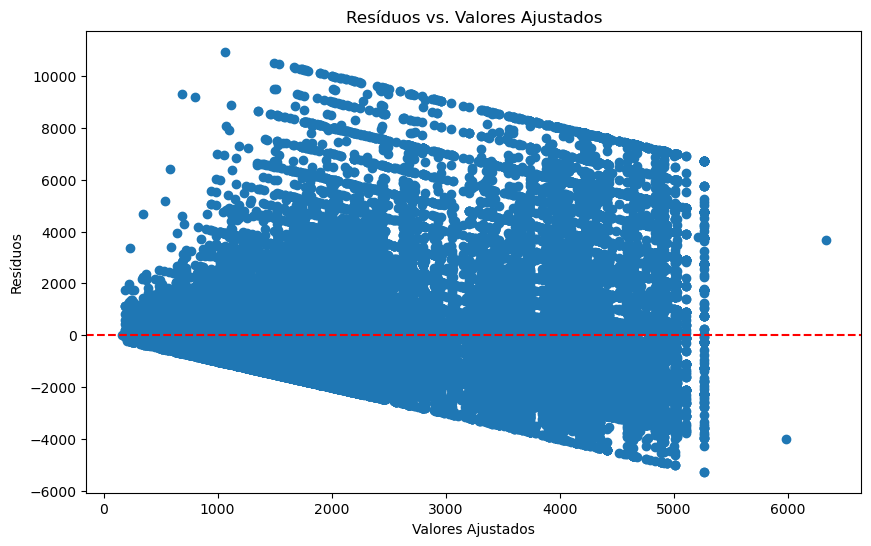

In [ ]:
valores_ajustados = results5.fittedvalues
residuos = results5.resid


# Resíduos vs. Valores Ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()

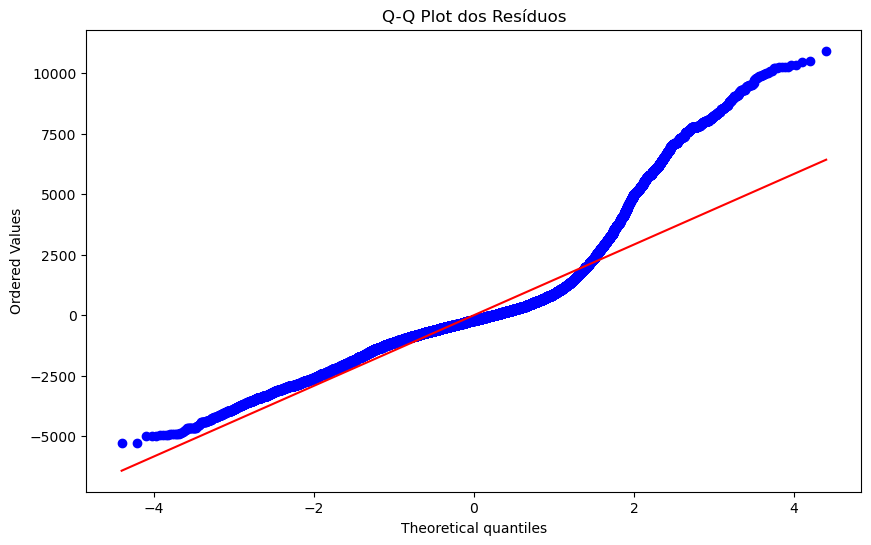

In [ ]:
# Plotando o Q-Q plot para verificar a normalidade dos erros
plt.figure(figsize=(10, 6))
probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

A maioria dos pontos no Q-Q plot se alinham bem à linha de referência, indicando que os resíduos são aproximadamente normais

### Método da Regressão Linear

A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.

O objetivo é ajustar uma linha reta (ou hiperplano, no caso de múltiplas variáveis) aos dados que minimiza a soma dos erros quadráticos das previsões. A linha de regressão é determinada pela equação

𝑌= 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + ... + 𝛽𝑛𝑋𝑛, onde 𝛽0 é o intercepto e 𝛽1,𝛽2,...,𝛽𝑛 são os coeficientes que representam a mudança esperada em Y para uma unidade de mudança em 𝑋1,𝑋2,...,𝑋𝑛.

Este método é amplamente utilizado devido à sua simplicidade e interpretabilidade, permitindo prever valores e entender a importância de diferentes variáveis independentes.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, Y_train)

y_reg = reg_model.predict(X_test)
x_reg = reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_reg})

erro_medio = metrics.mean_squared_error(Y_test, y_reg, squared= False)

r_quadrado_reg = metrics.r2_score(Y_test, y_reg)

display(reg_model_diff)

print("O erro médio foi de {0}".format(erro_medio))

print("O r squared do reg foi {0}".format(r_quadrado_reg))

,Actual value,Predicted value
21712,1000.0,1941.113648
330,1302.0,1590.762652
22548,1320.0,746.008924
95428,1550.0,1721.913999
75069,100.0,4010.576111
...,...,...
32828,1302.0,1060.230246
104570,4500.0,4328.464370
44976,1302.0,1508.907975
118928,2461.0,2031.457386


O erro médio foi de 1550.6347108423133
O r squared do reg foi 0.3384937479021177


### Método Random Forest Regression

Random Forest é um método de aprendizado de máquina baseado em árvores de decisão que combina múltiplas árvores para melhorar a precisão preditiva e o controle do overfitting.

Ele opera construindo uma "floresta" de árvores de decisão durante o treinamento e outputa a média (no caso de regressão) ou a moda (no caso de classificação) das previsões individuais de cada árvore. Cada árvore na floresta é treinada com um subconjunto diferente dos dados e das features, selecionados aleatoriamente, o que aumenta a robustez e a capacidade do modelo de generalizar para dados não vistos.

A diversidade introduzida pelo processo de randomização ajuda a reduzir a variância e o overfitting, resultando em um modelo mais estável e preciso.

In [ ]:
rfr_model = RandomForestRegressor(n_estimators=100)

rfr_model.fit(X_train, Y_train)

y_rfr = rfr_model.predict(X_test)
x_rfr = rfr_model.predict(X_train)

rfr_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': y_rfr})

erro_medio_rfr = metrics.mean_squared_error(Y_test, y_rfr, squared= False)

r_quadrado_rfr = metrics.r2_score(Y_test, y_rfr)

display(rfr_model_diff)

print("O erro médio foi de {0}".format(erro_medio_rfr))

print("O r squared do rfr foi {0}".format(r_quadrado_rfr))

,Actual value,Predicted value
21712,1000.0,1995.441959
330,1302.0,1894.204181
22548,1320.0,966.769497
95428,1550.0,1799.350328
75069,100.0,4075.563014
...,...,...
32828,1302.0,1656.345777
104570,4500.0,3999.480173
44976,1302.0,1120.469629
118928,2461.0,1952.269997


O erro médio foi de 1550.3630486303186
O r squared do rfr foi 0.33872551171946297


### Conclusão

Após a análise dos dados utilizando os métodos de Regressão Linear e Random Forest Regression, concluímos que o método Random Forest foi levemente superior, apesar do resultado final ser muito próximo em comparação ao método de Regressão Linear. 

É importante ressaltar que durante o processo de análise, a simplicidade dos dados sintéticos gerados pode ter limitado a performance de ambos os modelos.

Para futuras análises, utilizar métricas adicionais de avaliação podem proporcionar uma compreensão mais aprofundada dos modelos.

### Referências

1. Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to Linear Regression Analysis. Wiley.
2. Mastering Predicting House Prices with Python: A Comprehensive Guide. https://levelup.gitconnected.com/mastering-predicting-house-prices-with-python-a-comprehensive-guide-d160782efe43
3. Create a Model to Predict House Prices Using Python. https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f